## Extracting individual spectra of spectroscopic binaries using the Fourier transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Readiing data
data=np.load("sb2.npz")
wave=data["la_nm"]
v_prim=data["vA_m_s"]
v_sec=data["vB_m_s"]
spectrum=data["spectra"]

In [3]:
first=spectrum[0]
first

array([37748.50081275, 38805.98195971, 40321.62981739, ...,
       61164.77375461, 60998.90323058, 60819.48829612])

In [4]:
spectrum[:,0]

array([37748.50081275, 52576.72701698, 43016.09952126, 52363.16987609,
       43129.48748933, 38175.74367663, 42544.79508458, 41021.72543218,
       40394.84208658, 45120.29002913, 50806.1536684 , 51376.46622358,
       42303.87247299, 48952.35270309, 41202.80643839, 51746.33869816,
       38494.60562992, 36749.44369289, 51862.60539754, 38036.44878723,
       51292.90934696, 52016.18400502, 50354.59708135, 50041.72745582,
       48149.93149566, 36043.2486893 , 36397.50697235, 35341.52620413,
       40270.35965961, 51996.01465684, 35157.73279391, 40913.16558689,
       48286.22342749, 35588.48661292])

(587.0, 592.0)

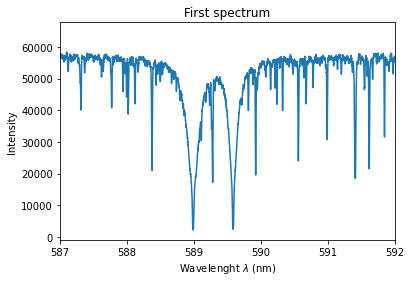

In [20]:
plt.plot(wave,first,label="spectrum")
plt.xlabel("Wavelenght $λ$ (nm)")
plt.ylabel("Intensity")
plt.title("First spectrum")
plt.xlim(587,592) 
#PPLOT THE TOTAL 


### GIve the expression of F as a function of both spectra


$$F(\lambda)= F_{A}(\lambda_{E}) + F_{B}(\lambda_{E})$$

$$F(\lambda)= F_{A}(\lambda - \Delta \lambda_{A}) + F_{B}(\lambda - \Delta\lambda_{B})$$

In [6]:
#COmputing lambdaA
c=2.99e8
betaA=v_prim/c
numA=1+betaA
denA=1-betaA

a=np.sqrt(numA/denA) -1
lambdaA=589.5*a
lambdaA


array([-0.00908542,  0.01559089, -0.01366053,  0.01541676, -0.01332947,
       -0.00877856, -0.01283414, -0.01163199, -0.01651384,  0.00492279,
        0.01143097,  0.01219756, -0.01431743,  0.00733702, -0.0159156 ,
        0.01665298, -0.00953271, -0.00662981,  0.0167956 , -0.00941951,
        0.01237754,  0.01349403,  0.00935818,  0.00832367,  0.00652876,
       -0.00603818, -0.00663888, -0.00555601, -0.01641793,  0.01658931,
       -0.00525952, -0.01617436,  0.00663792,  0.00046359])

In [7]:
betaB=v_sec/c
numB=1+betaB
denB=1-betaB

b=pow(numB/denB,0.5) -1
lambdaB=589.5*b
lambdaB

array([ 0.02737434, -0.04697136,  0.04115977, -0.04644677,  0.04016224,
        0.02644974,  0.03866972,  0.03504746,  0.04975739, -0.01483164,
       -0.03443907, -0.03674854,  0.04313912, -0.02210519,  0.04795475,
       -0.05017097,  0.02872206,  0.01997544, -0.05060062,  0.02838098,
       -0.03729076, -0.04065433, -0.02819438, -0.02507769, -0.01967009,
        0.01819281,  0.02000275,  0.01674003,  0.04946839, -0.04997917,
        0.01584672,  0.04873446, -0.01999897, -0.00139674])

### Doppler shifts in Fourier space


From general formula we have:

$$\hat{f} (\nu)= \int_{-\infty}^{\infty} e^{-2i\pi\nu t} f(t) dt$$

$$\hat{F}(\nu)= \hat{F}_{A} (\nu) + \hat{F}_{B} (\nu)$$
Making a change of variables we obtain:

$$\hat{F}(\nu)= e^{-2i\pi\nu \Delta \lambda_{A}} \hat{F}_{A} (\nu) + e^{-2i\pi\nu \Delta \lambda_{B}}  \hat{F}_{B} (\nu)$$




In [8]:
C=54440
n=len(wave)
f_apo=[]
window=[]
for k in range (len(spectrum[0,:])):
    w=np.sin(np.pi*k/n)*np.sin(np.pi*k/n)
    window.append(w)

f_apo=window*(spectrum-C)
fourier_apo=np.fft.fft(f_apo)

In [9]:
np.shape(fourier_apo[:,59999])

(34,)

In [10]:
freq = np.fft.fftfreq(60000)
matrix=[]
param=[]
Fa=[]
Fb=[]

for j in range (len(fr eq)):
    matrix=np.array([np.exp(-2*1j*np.pi*freq[j]*lambdaA/0.001) ,np.exp(-2*1j*np.pi*freq[j]*lambdaB/0.001)])
    ind=np.linalg.lstsq(matrix.T,fourier_apo[:,j])[0]
    Fa.append(ind[0])
    Fb.append(ind[1])
    
np.shape(matrix)
    

/tmp/ipykernel_3442/2607023829.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ind=np.linalg.lstsq(matrix.T,fourier_apo[:,j])[0]


(2, 34)

In [11]:
np.shape(Fa)

(60000,)

/home/marianity/anaconda3/envs/MD1/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


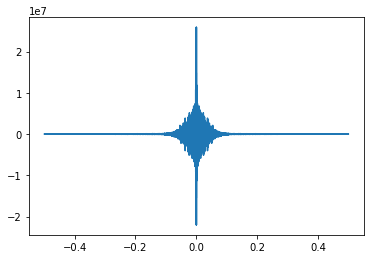

In [12]:
plt.plot(freq,Fa)

In [13]:
invFa=np.fft.ifft(Fa)
invFb=np.fft.ifft(Fb)
Fab=invFa+invFb

In [14]:
invFa

array([-101.15388592+0.03304036j, -101.12415481-0.03304036j,
       -101.18395615+0.03304036j, ..., -101.06352698-0.03304036j,
       -101.12359616+0.03304036j, -101.09375256-0.03304036j])

(587.0, 592.0)

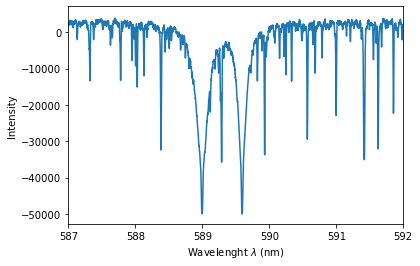

In [15]:
# from matplotlib.pyplot import figure
# figure(figsize=(6, 6), dpi=80)
plt.plot(wave,invFa.real)
plt.xlabel("Wavelenght $λ$ (nm)")
plt.ylabel("Intensity")
plt.xlim(587,592) 


# plt.plot(wave,invFb.real)
# plt.xlabel("Wavelenght $λ$ (nm)")
# plt.ylabel("Intensity")
# plt.xlim(587,592) 



In [17]:
correctFa=invFa/window
correctFb=invFb/window

correctFab=correctFa+correctFb


/tmp/ipykernel_3442/2286099540.py:1: RuntimeWarning: divide by zero encountered in true_divide
  correctFa=invFa/window
/tmp/ipykernel_3442/2286099540.py:2: RuntimeWarning: divide by zero encountered in true_divide
  correctFb=invFb/window
/tmp/ipykernel_3442/2286099540.py:4: RuntimeWarning: invalid value encountered in add
  correctFab=correctFa+correctFb


(-3000.0, 1000.0)

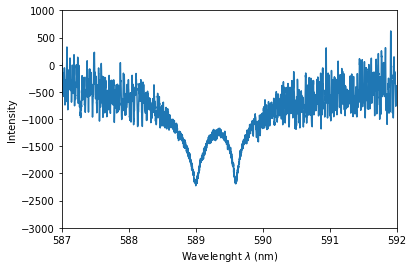

In [19]:
plt.plot(wave,correctFb.real)
plt.xlabel("Wavelenght $λ$ (nm)")
plt.ylabel("Intensity")
plt.xlim(587,592) 
plt.ylim(-3000,1000)

